In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

from Lineaire.Linear import *
from Loss.BCELoss import BCELoss
from Activation.Tanh import Tanh
from Activation.Sigmoide import Sigmoide
from Encapsulation.AutoEncodeur import AutoEncodeur
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import SGD

from utils import tools

from icecream import ic


# Dataset: SKLearn Digits

In [2]:

size =1000
np.random.seed(5)


digits = load_digits()
#print(digits.data.shape)
# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [3]:
loss_mse = BCELoss()
lineaire1 = Linear(X_train.shape[1], 32, init_type=1)
lineaire2 = Linear(32, 8, init_type=1)
lineaire3 = Linear(8, 32, init_type=1)
lineaire4 = Linear(32, 64, init_type=1)
sig = Sigmoide()
tanh = Tanh()
tanh2 = Tanh()
tanh3 = Tanh()

iter=100

net = AutoEncodeur(lineaire1, tanh, lineaire2, tanh2, lineaire3, tanh3, lineaire4, sig)
#net = Sequentiel(lineaire1, tanh, lineaire4, sig)
#opt = Optim(net, loss_mse)

net, couts, opt = SGD(net, X_train, X_train,nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-1, shuffle=True)


ic| X.shape: (1437, 64), Y.shape: (1437, 64)


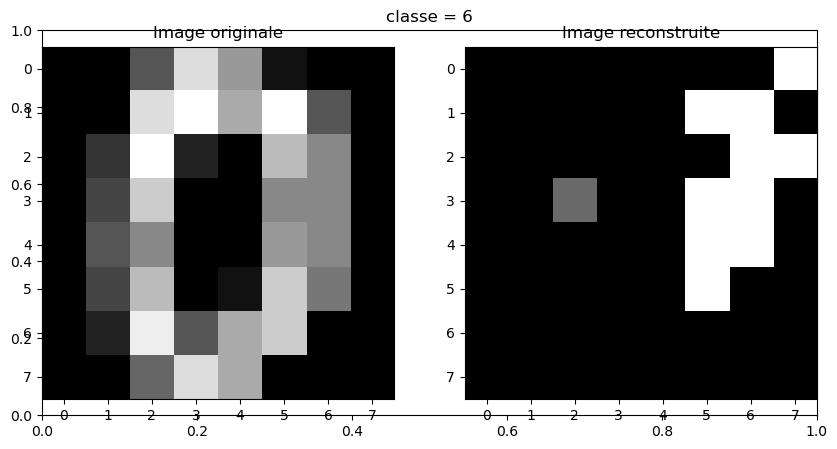

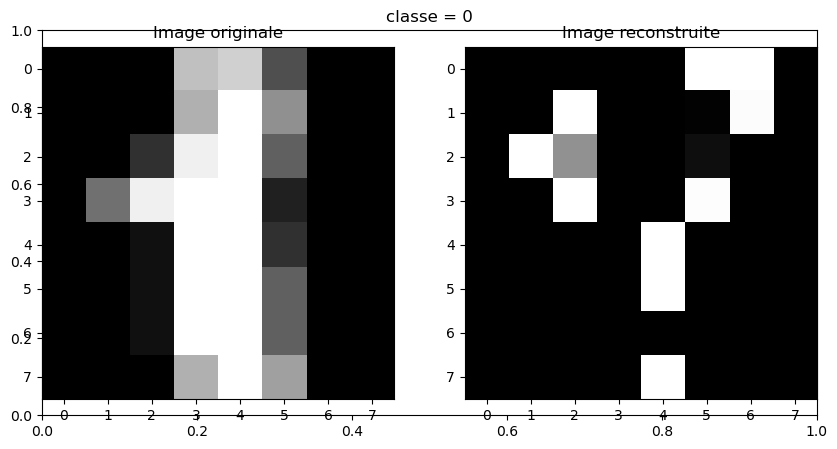

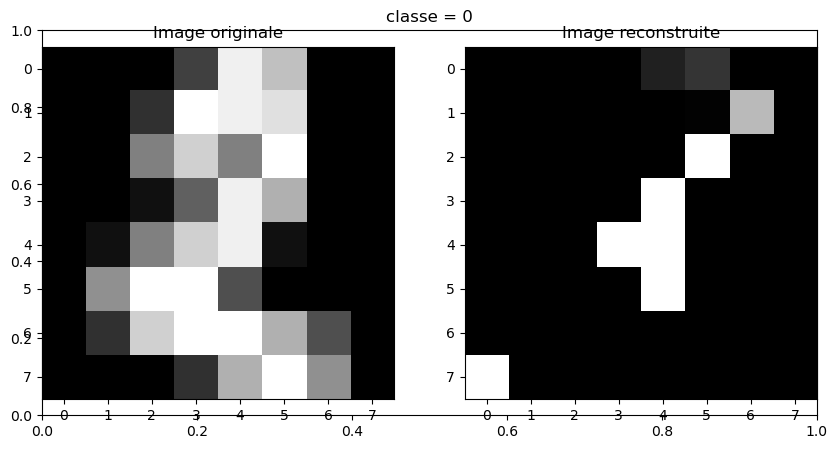

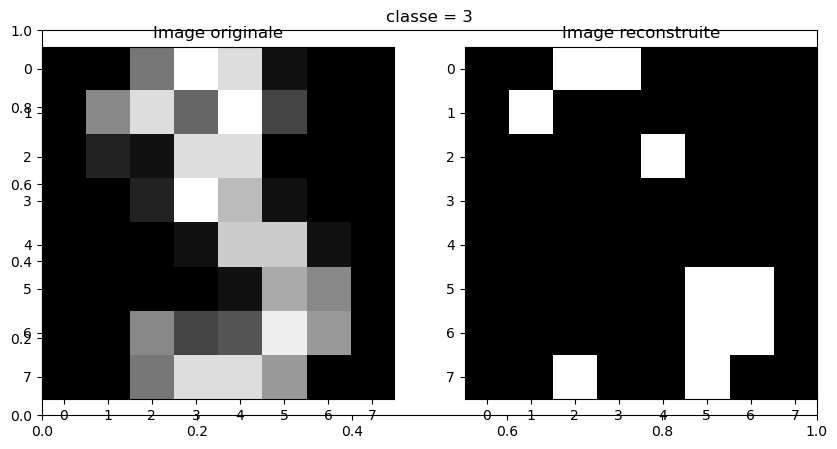

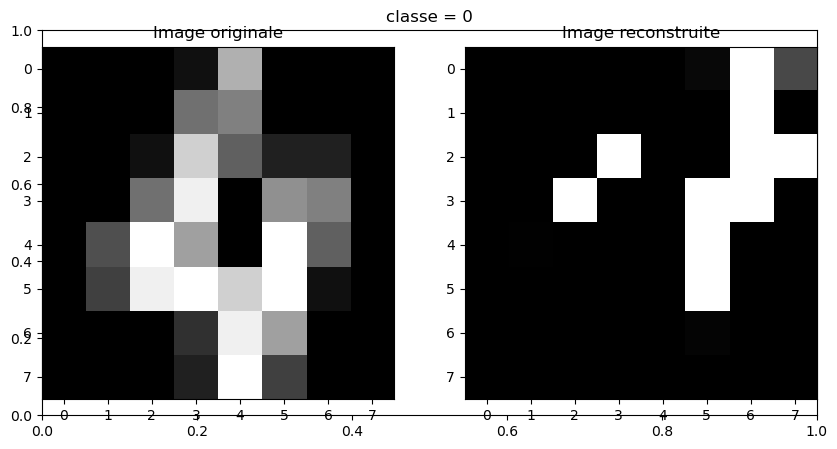

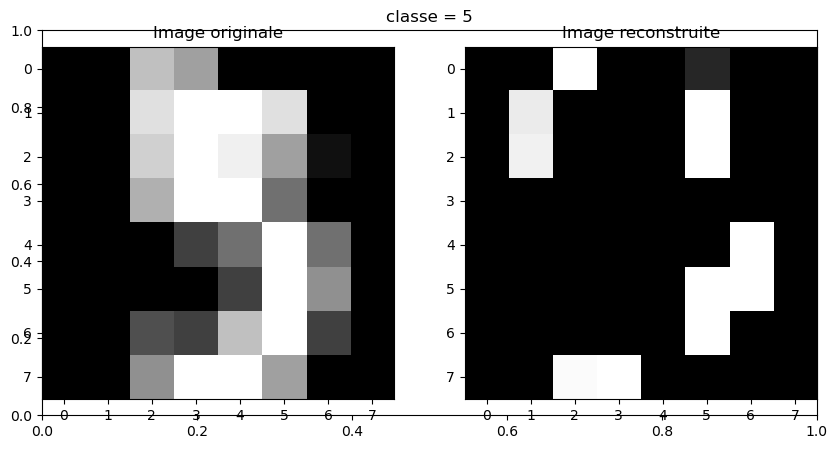

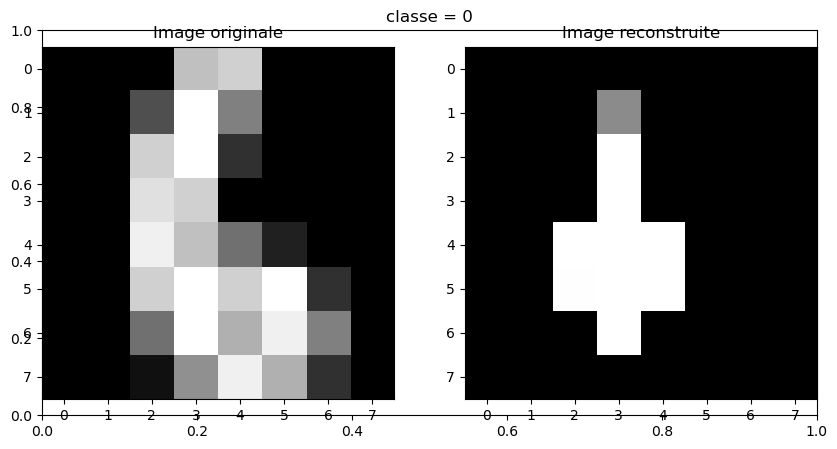

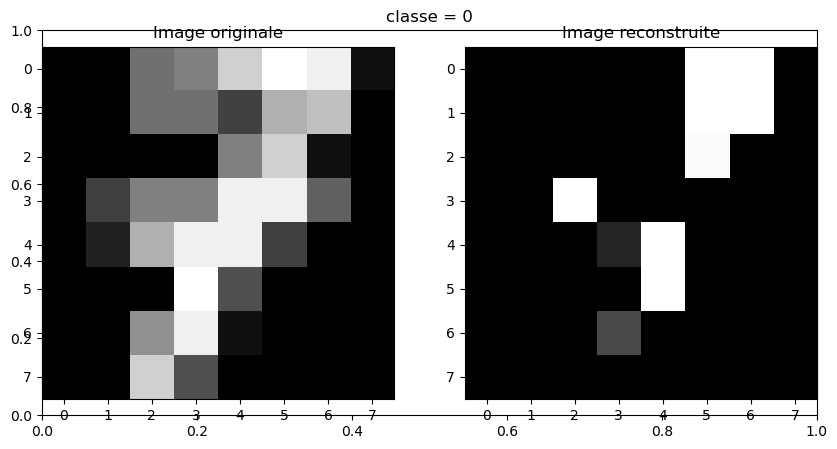

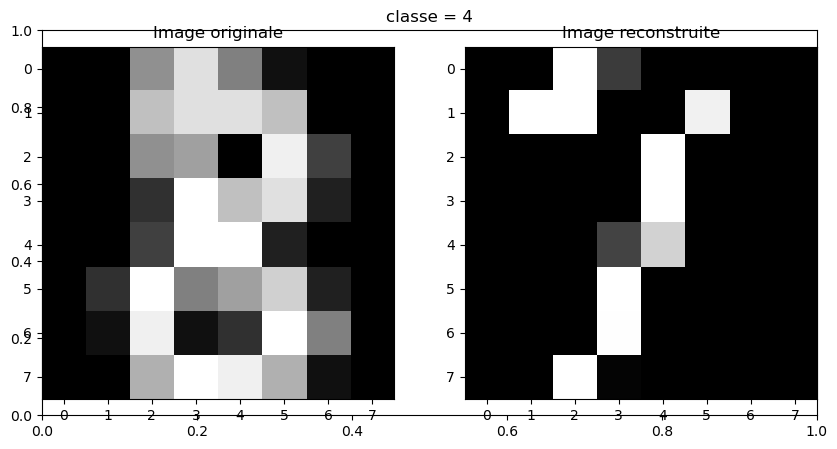

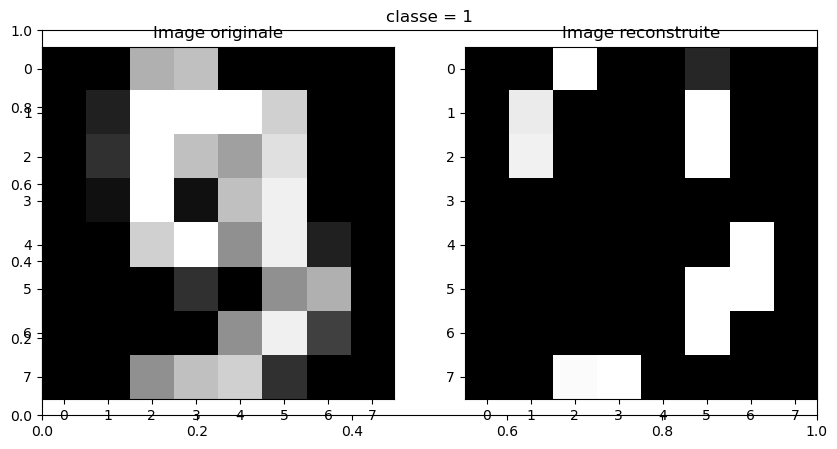

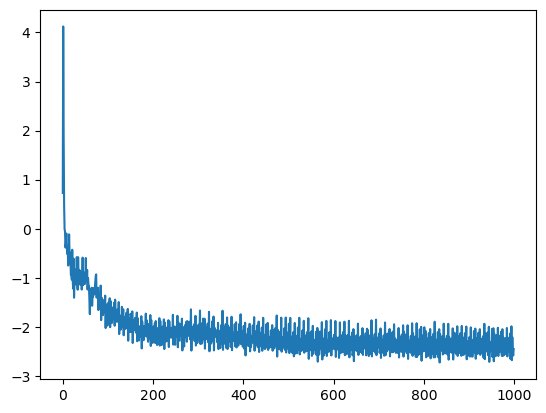

In [4]:

i = 0
def predict(i):
    plt.figure(figsize=(10, 5))  # Ajustez la taille de la figure selon vos besoins
    plt.title(f'classe = {y_train[i]}')
    
    plt.subplot(1, 2, 1)  # Première cellule de la grille
    plt.imshow(digits.data[i].reshape((8,8)), cmap='grey')
    plt.title('Image originale')
    pred = opt._net.forward(digits.data[i].reshape((1,64)))
    plt.subplot(1, 2, 2)  # Deuxième cellule de la grille
    plt.imshow(pred.reshape((8,8)), cmap='grey')
    plt.title('Image reconstruite')
    plt.show()
    #print('classe = ', y_train[i])

for i in range(10):
    predict(i)

plt.plot(range(len(couts)), couts)
plt.show()



# Dataset: USPS

In [17]:
path_train = "dataset/USPS_train.txt"
path_test = "dataset/USPS_test.txt"

trainx, train_y = tools.load_usps(path_train)
testx, test_y = tools.load_usps(path_test)

ic(trainx.shape)
np.random.seed(0)

ic| trainx.shape: (7291, 256)


## Sabrina

In [7]:
out1=64
out2=10

BCE_loss = BCELoss()
modul_lin1 = Linear( trainx.shape[1], out1)
modul_lin2 = Linear(out1, out2)
modul_lin3 = Linear( out2, out1)
modul_lin4 = Linear(out1, trainx.shape[1])

modul_lin3._parameters = modul_lin2._parameters.T
modul_lin4._parameters = modul_lin1._parameters.T

encoder=[modul_lin1,Tanh(),modul_lin2,Tanh()]
decoder=[modul_lin3,Tanh(),modul_lin4,Sigmoide()]

encoder_100_10 = Sequentiel(*(encoder+decoder))

#opt = Optim(encoder_100_10,BCE_loss,1e-4)
nb_iter = 100
#l_loss = SGD(trainx,trainx,100,epochs=1000,shuffle=True)
net, couts, opt = SGD(encoder_100_10, trainx, trainx, nb_batch=10, loss=BCE_loss, nb_epochs=nb_iter, eps=1e-3, shuffle=False)


ic| X.shape: (7291, 256), Y.shape: (7291, 256)


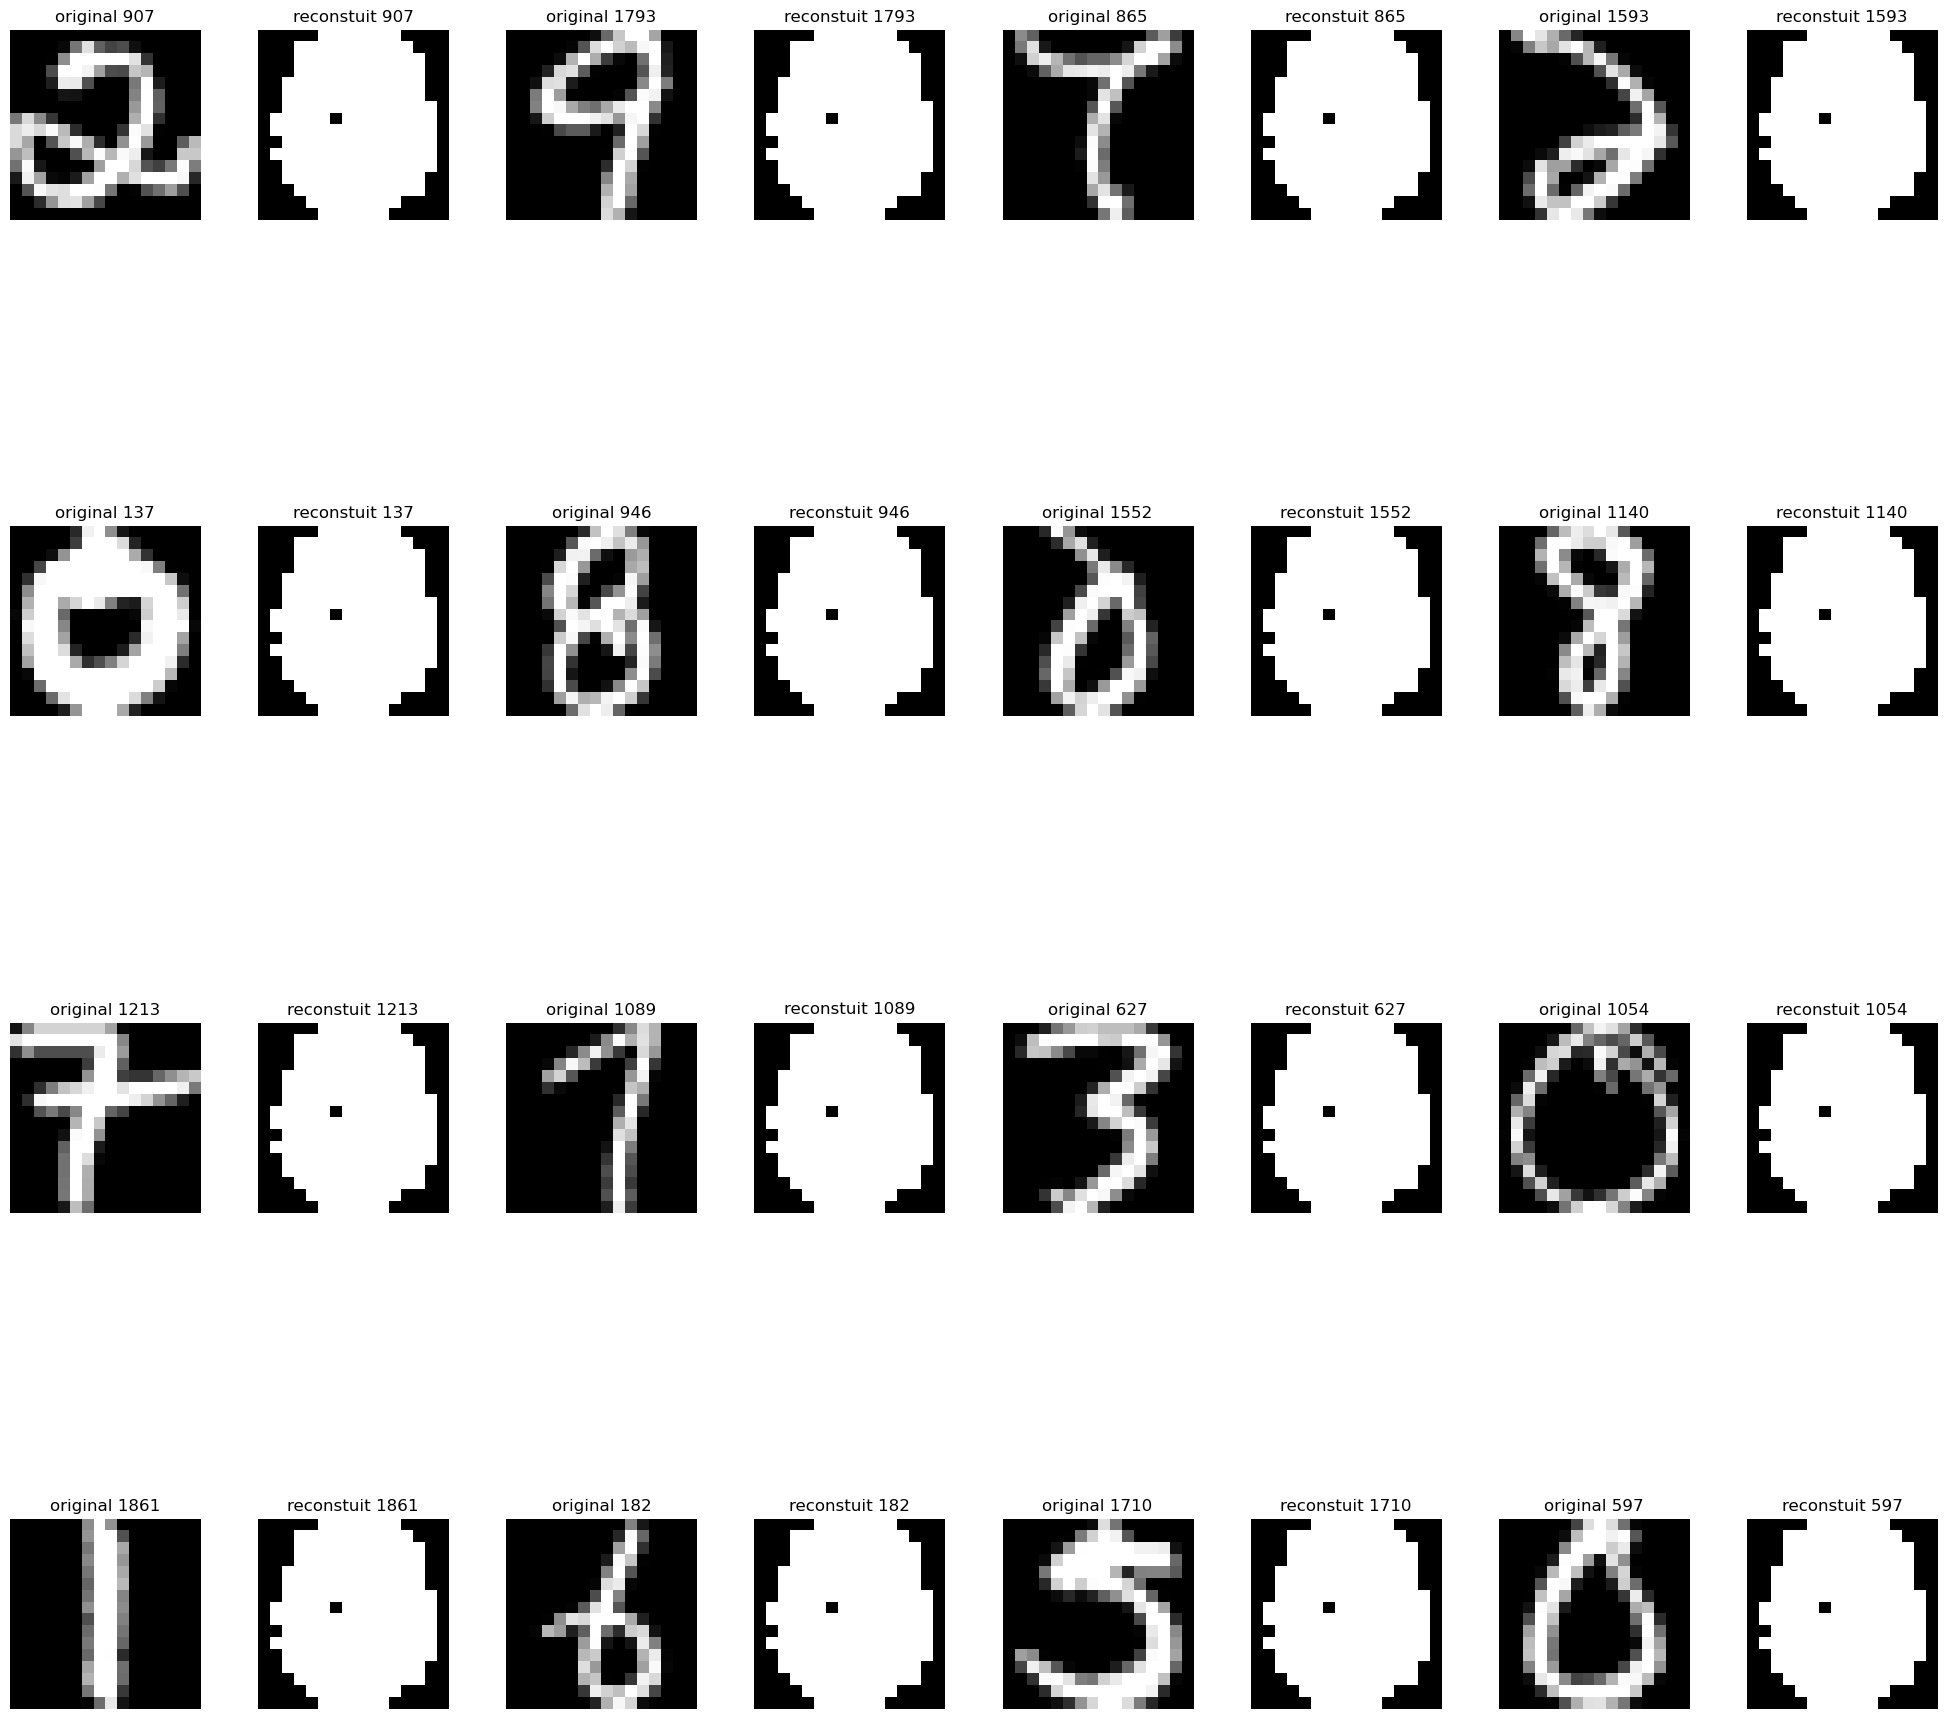

In [8]:
tools.print_auto_encoder(testx,encoder_100_10,16,16)

## Nous

In [15]:
def predict(i, X, Y):
    dim = int(np.sqrt(X.shape[1]))
    
    plt.figure(figsize=(5, 2))  # Ajustez la taille de la figure selon vos besoins
    #plt.title(f'classe = {Y[i]}')
    
    plt.subplot(1, 2, 1)  # Première cellule de la grille
    plt.imshow(X[i].reshape((dim,dim)), cmap='grey')
    plt.title(f'Image originale ({Y[i]})')
    pred = opt._net.forward(X[i].reshape((1,dim**2)))
    plt.subplot(1, 2, 2)  # Deuxième cellule de la grille
    plt.imshow(pred.reshape((dim,dim)), cmap='grey')
    plt.title('Image reconstruite')
    plt.show()
    #print('classe = ', y_train[i])


### Config 1

In [11]:
size = 1000

#X_train = X_train[:2000, :]

scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)

loss_mse = BCELoss()
lineaire1 = Linear(trainx.shape[1], 64, init_type=1)
lineaire2 = Linear(64, 10, init_type=1)
lineaire3 = Linear(10, 64, init_type=1)
lineaire4 = Linear(64, trainx.shape[1], init_type=1)
sig = Sigmoide()
tanh = Tanh()
tanh2 = Tanh()
tanh3 = Tanh()

iter=100

net = AutoEncodeur(lineaire1, tanh, lineaire2, tanh2, lineaire3, tanh3, lineaire4, sig)
#net = Sequentiel(lineaire1, tanh, lineaire4, sig)
#opt = Optim(net, loss_mse)

net, couts, opt = SGD(net, trainx, trainx,nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=True)


ic| X.shape: (7291, 256), Y.shape: (7291, 256)


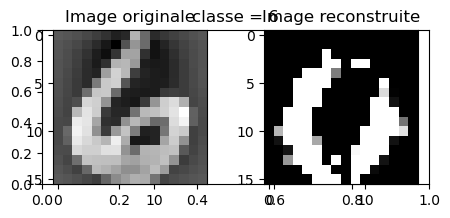

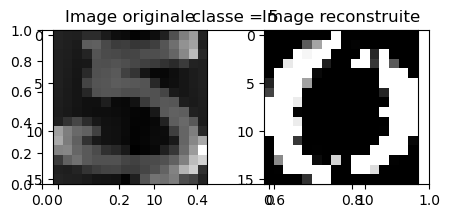

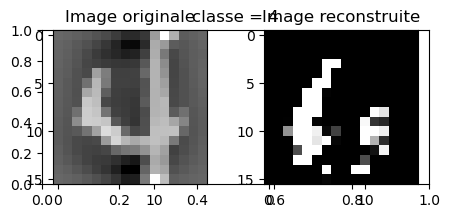

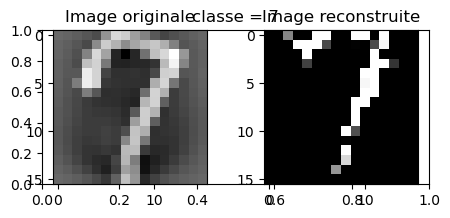

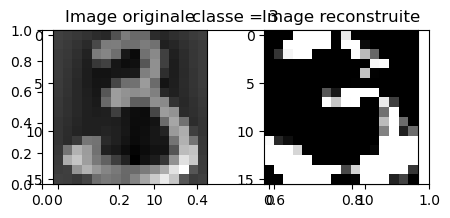

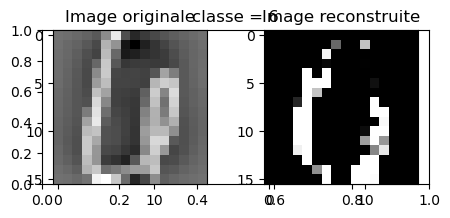

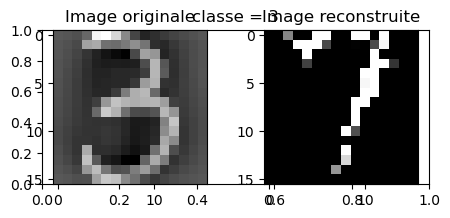

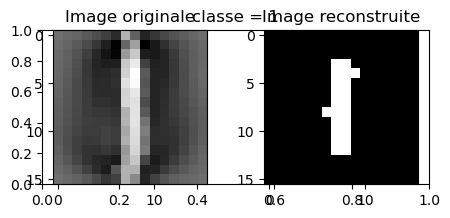

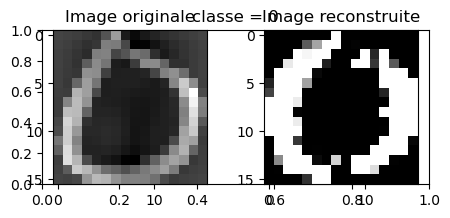

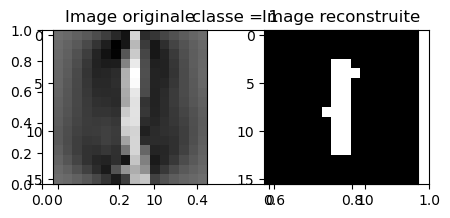

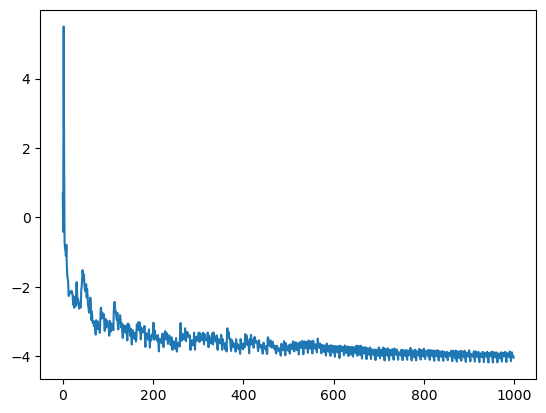

In [16]:
i = 0

for i in range(10):
    predict(i, trainx, train_y)

plt.plot(range(len(couts)), couts)
plt.show()



### Config 2

In [13]:
trainx = trainx[:1000, :]

scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)

loss_mse = BCELoss()
lineaire1 = Linear(trainx.shape[1], 128, init_type=1)
lineaire2 = Linear(128, 8, init_type=1)
lineaire3 = Linear(8, 128, init_type=1)
lineaire4 = Linear(128, trainx.shape[1], init_type=1)
sig = Sigmoide()
tanh = Tanh()
tanh2 = Tanh()
tanh3 = Tanh()

iter=100

net = AutoEncodeur(lineaire1, tanh, lineaire2, tanh2, lineaire3, tanh3, lineaire4, sig)
#net = Sequentiel(lineaire1, tanh, lineaire4, sig)
#opt = Optim(net, loss_mse)

net, couts, opt = SGD(net, trainx, trainx,nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=True)


ic| X.shape: (1000, 256), Y.shape: (1000, 256)

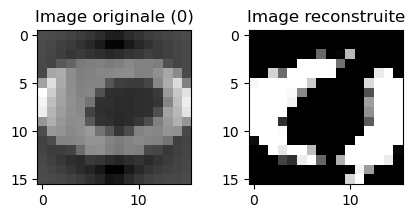

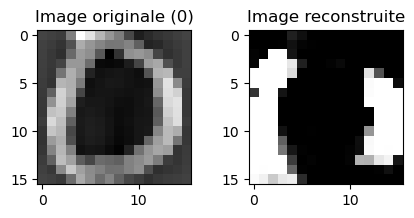

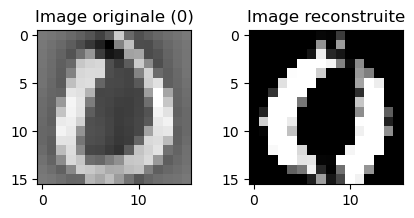

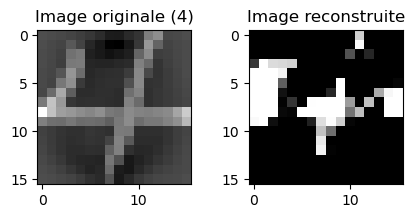

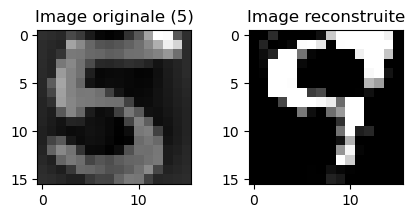

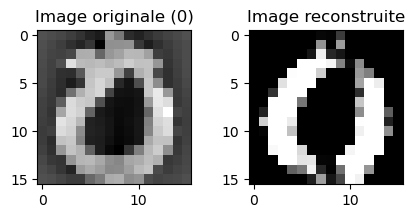

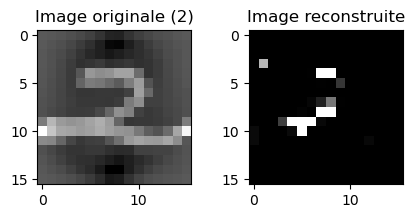

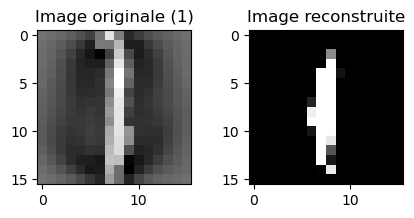

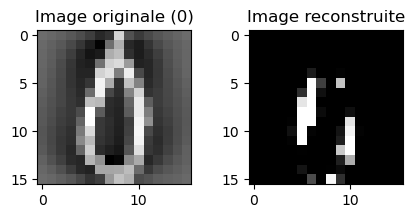

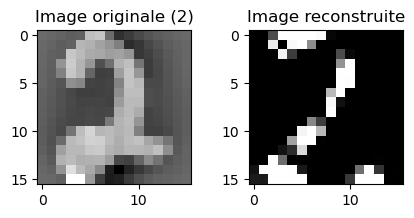

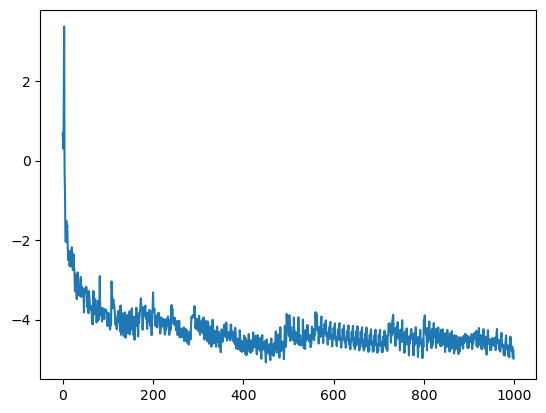

In [16]:
nb_tests = 10
indices = [np.random.randint(0, len(trainx)) for _ in range(nb_tests)]

for i in indices:
    predict(i, trainx, train_y)

plt.plot(range(len(couts)), couts)
plt.show()



### Config 3

In [18]:
trainx = trainx[:3000, :]

scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)

loss_mse = BCELoss()
lineaire1 = Linear(trainx.shape[1], 64, init_type=1)
lineaire2 = Linear(64, 2, init_type=1)
lineaire3 = Linear(2, 64, init_type=1)
lineaire4 = Linear(64, trainx.shape[1], init_type=1)
sig = Sigmoide()
tanh = Tanh()
tanh2 = Tanh()
tanh3 = Tanh()

iter=100

net = AutoEncodeur(lineaire1, tanh, lineaire2, tanh2, lineaire3, tanh3, lineaire4, sig)
#net = Sequentiel(lineaire1, tanh, lineaire4, sig)
#opt = Optim(net, loss_mse)

net, couts, opt = SGD(net, trainx, trainx,nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=True)


ic| X.shape: (3000, 256), Y.shape: (3000, 256)


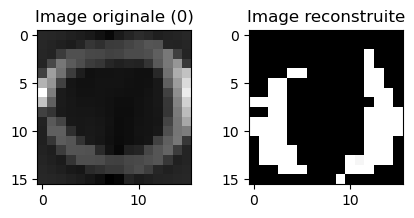

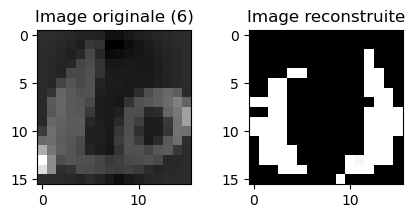

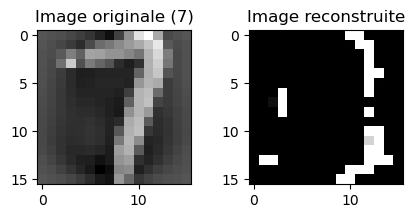

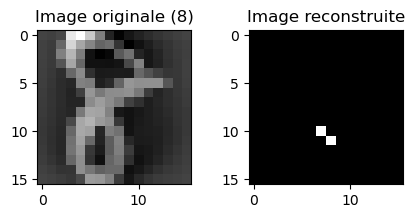

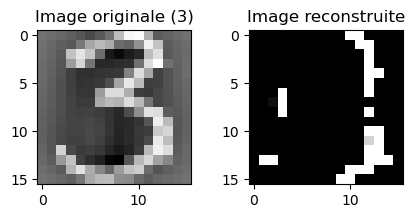

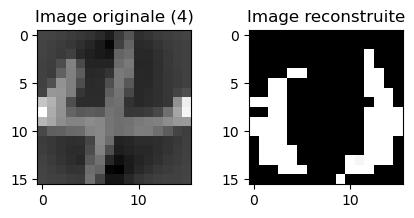

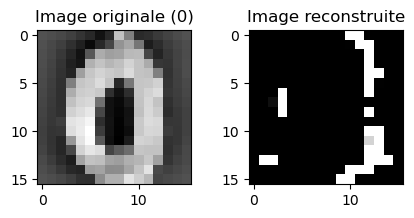

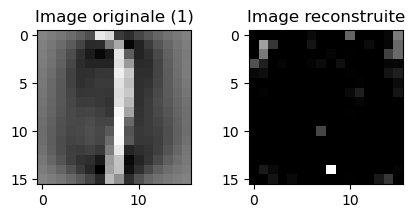

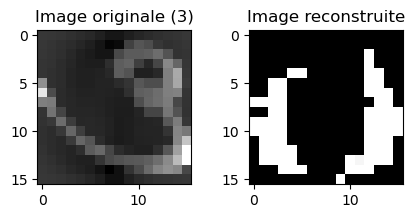

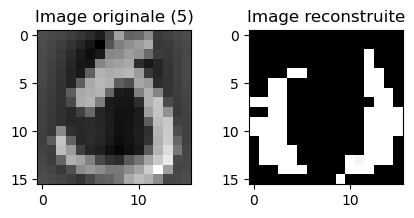

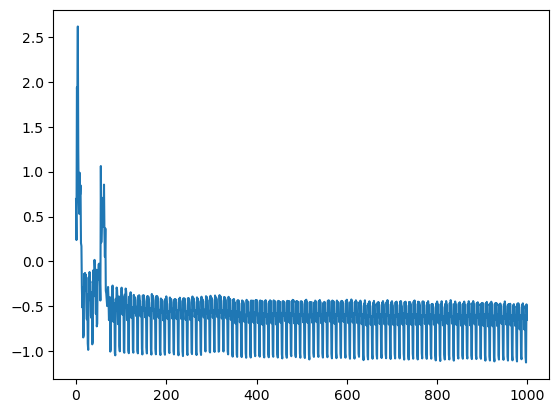

In [19]:
nb_tests = 10
indices = [np.random.randint(0, len(trainx)) for _ in range(nb_tests)]

for i in indices:
    predict(i, trainx, train_y)

plt.plot(range(len(couts)), couts)
plt.show()



# Clustering